In [11]:
#imports all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [12]:
df=pd.read_csv("temp.csv")
df.head()

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8


In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
df['Date'] = df['Date'].str.replace('-', '').astype(int)
df

,Date,Daily minimum temperatures
0,19810101,20.7
1,19810102,17.9
2,19810103,18.8
3,19810104,14.6
4,19810105,15.8
...,...,...
3645,19901227,14
3646,19901228,13.6
3647,19901229,13.5
3648,19901230,15.7


In [14]:
df = df.rename(columns={'Daily minimum temperatures': 'Temperature'})

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         3650 non-null   int32 
 1   Temperature  3650 non-null   object
dtypes: int32(1), object(1)
memory usage: 42.9+ KB


In [16]:
# Replace non-numeric values with NaN
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')
df = df.interpolate(method='linear', axis=0)
df['Temperature'] = df['Temperature'].astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         3650 non-null   int32  
 1   Temperature  3650 non-null   float64
dtypes: float64(1), int32(1)
memory usage: 42.9 KB


In [18]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Temperature'])

# Print test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.440522006557913
p-value: 0.00025147236020337557
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


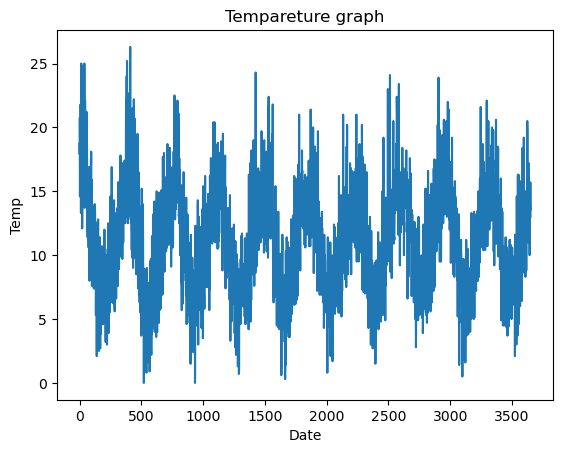

In [19]:
import matplotlib.pyplot as plt

plt.plot(df['Temperature'])
plt.title('Tempareture graph')
plt.xlabel('Date')
plt.ylabel('Temp')
plt.show()

In [20]:
#taking train_test_split to split the data in two parts for train and test
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
#making the model 
model = LinearRegression()
model.fit(X_train, y_train)
    
y_pred = model.predict(X_test)

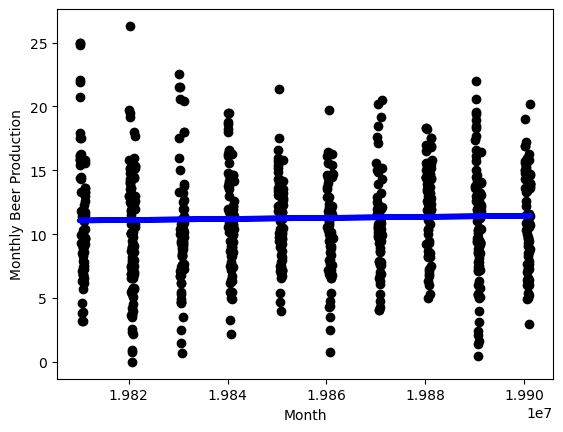

-0.005939501902500144


In [22]:
#with the predicted value and actual value find the r2 score and plot the data
from sklearn.metrics import r2_score

x=r2_score(y_test, y_pred)
    
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=4)
plt.xlabel('Month')
plt.ylabel('Monthly Beer Production')
plt.show()
print(x)